In [25]:
import pandas as pd
import numpy as np

# יצירת DataFrame של משתמשים עם מזהים
user_ids = np.arange(7624)  # Assuming 7624 users as per the graph nodes count

# רשימת מיקומים במדינות אסיה
asian_locations = [
    'China', 'Japan', 'India', 'South Korea', 'Thailand', 'Vietnam', 'Indonesia', 'Malaysia',
    'Singapore', 'Philippines', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Myanmar',
    'Laos', 'Cambodia', 'Mongolia', 'North Korea', 'Bhutan', 'Maldives'
]

# יצירת רשימת מיקומים מדומה
locations = np.random.choice(asian_locations, len(user_ids))

# יצירת DataFrame עם מיקומים מדומים
user_locations_df = pd.DataFrame({
    'id': user_ids,
    'location': locations
})

# שמירת ה-DataFrame לקובץ CSV
file_path = '/user_locations_asia.csv'
user_locations_df.to_csv(file_path, index=False)

file_path

'/user_locations_asia.csv'

## טעינת וסקירת הנתונים
בקטע קוד זה, אנו טוענים את קובצי הנתונים ובודקים את השורות הראשונות של כל קובץ כדי להבין את המבנה שלהם.

In [22]:
import pandas as pd
import networkx as nx
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the datasets with direct download links
targets_df = pd.read_csv('https://drive.google.com/uc?id=1uTEoD1AtUnuxD7ZdGmVZjZvPIcpASXbo&export=download')
edges_df = pd.read_csv('https://drive.google.com/uc?id=1QJsVl33Cst3tRIjqVHGZUq4UbvYpybI4&export=download')
er_features_df = pd.read_csv('https://drive.google.com/uc?id=1l2JwB-LjqzipmLKBhBPAgS8eh4kc_O3N&export=download')
user_locations_df = pd.read_csv('https://drive.google.com/uc?id=1KBGP8bGjgKq8FNkGNYkdvnfiWQDlSMYJ&export=download')

# Display the first few rows of each dataframe
print("Targets DataFrame:")
print(targets_df.head())

print("\nEdges DataFrame:")
print(edges_df.head())

print("\nER Features DataFrame:")
print(er_features_df.head())

print("\nUser Locations DataFrame:")
print(user_locations_df.head())

Targets DataFrame:
   id  target
0   0       8
1   1      17
2   2       3
3   3      17
4   4       5

Edges DataFrame:
   node_1  node_2
0       0     747
1       1    4257
2       1    2194
3       1     580
4       1    6478

ER Features DataFrame:
        x_0       x_1       x_2       x_3       x_4       x_5       x_6  \
0  0.537889 -1.794125  0.754011  0.288009 -1.302571  0.395296 -0.820658   
1  0.174724 -0.602875  0.307457  2.058287 -0.860855 -0.979727 -1.272549   
2  0.540651  0.040224 -1.595341  1.655334 -0.499269  0.216884 -2.982086   
3 -0.052002  0.577616  0.685272 -0.276833  0.656839  0.856086 -2.236921   
4  1.526134 -0.218505  0.172405  0.249365 -0.947972 -1.305985  1.359645   

        x_7       x_8       x_9      x_10      x_11      x_12      x_13  \
0 -0.730763 -0.470652  0.728213 -0.441763 -1.786087 -0.159777 -0.430397   
1  0.017908  0.656086  0.539283  0.217067 -0.763946  0.478911  0.423590   
2  0.250913  0.421821  1.891900 -2.138269  0.235860  0.006909 -0.281695

# בניית הגרף
בקטע קוד זה, אנו יוצרים גרף ריק ומשתמשים בקובץ הקצוות להוספת הקצוות לגרף.

In [23]:
# Create an empty graph
G = nx.Graph()

# Add edges to the graph
for _, row in edges_df.iterrows():
    G.add_edge(row['node_1'], row['node_2'])

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

Graph has 7624 nodes and 27806 edges


# זיהוי קהילות
בקטע קוד זה, אנו משתמשים בשיטת Louvain לזיהוי קהילות בגרף ומוסיפים את המידע על הקהילות לנתוני המשתמשים.

In [14]:
# Apply the Louvain method
partition = community_louvain.best_partition(G)

# Add partition information to the targets dataframe
targets_df['community'] = targets_df['id'].map(partition)

# Display the first few rows with community information
print(targets_df.head())

   id  target  community
0   0       8          0
1   1      17          1
2   2       3          5
3   3      17          4
4   4       5          8


# ניתוח קהילות
בקטע קוד זה, אנו מנתחים את הקהילות שנמצאו ובודקים את החלוקה הגיאוגרפית של המשתמשים בכל קהילה.

In [15]:
# Merge the ER features with the targets DataFrame on 'id'
er_features_df['id'] = er_features_df.index
df_merged = pd.merge(targets_df, er_features_df, on='id')

# Merge the user locations with the merged DataFrame on 'id'
df_merged = pd.merge(df_merged, user_locations_df, on='id')

# הצגת הנתונים הממוזגים עם המיקומים
print("\nMerged DataFrame with Locations:")
print(df_merged.head())

# Group by community and analyze the geographical distribution using 'location' column
community_analysis = df_merged.groupby('community')['location'].value_counts().unstack().fillna(0)
print("\nCommunity Analysis:")
print(community_analysis)


Merged DataFrame with Locations:
   id  target  community       x_0       x_1       x_2       x_3       x_4  \
0   0       8          0  0.537889 -1.794125  0.754011  0.288009 -1.302571   
1   1      17          1  0.174724 -0.602875  0.307457  2.058287 -0.860855   
2   2       3          5  0.540651  0.040224 -1.595341  1.655334 -0.499269   
3   3      17          4 -0.052002  0.577616  0.685272 -0.276833  0.656839   
4   4       5          8  1.526134 -0.218505  0.172405  0.249365 -0.947972   

        x_5       x_6       x_7       x_8       x_9      x_10      x_11  \
0  0.395296 -0.820658 -0.730763 -0.470652  0.728213 -0.441763 -1.786087   
1 -0.979727 -1.272549  0.017908  0.656086  0.539283  0.217067 -0.763946   
2  0.216884 -2.982086  0.250913  0.421821  1.891900 -2.138269  0.235860   
3  0.856086 -2.236921 -0.636812 -0.271135 -0.494357 -1.063355 -0.210684   
4 -1.305985  1.359645 -1.418989  1.913470 -0.524754 -0.914865 -0.930795   

       x_12      x_13      x_14      x_15     

# ויזואליזציה של הגרף והקהילות
בקטע קוד זה, אנו מייצרים גרף המציג את הקהילות בצבעים שונים.

מסקנות מהצגת האמצע שלנו: להשתמש בצבעים לא דומים לקהילות

ובנוסף אנו מייצרים מפה אינטראקטיבית על מנת להמחיש את הקהילות

<ipython-input-16-b0dc6989871a>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


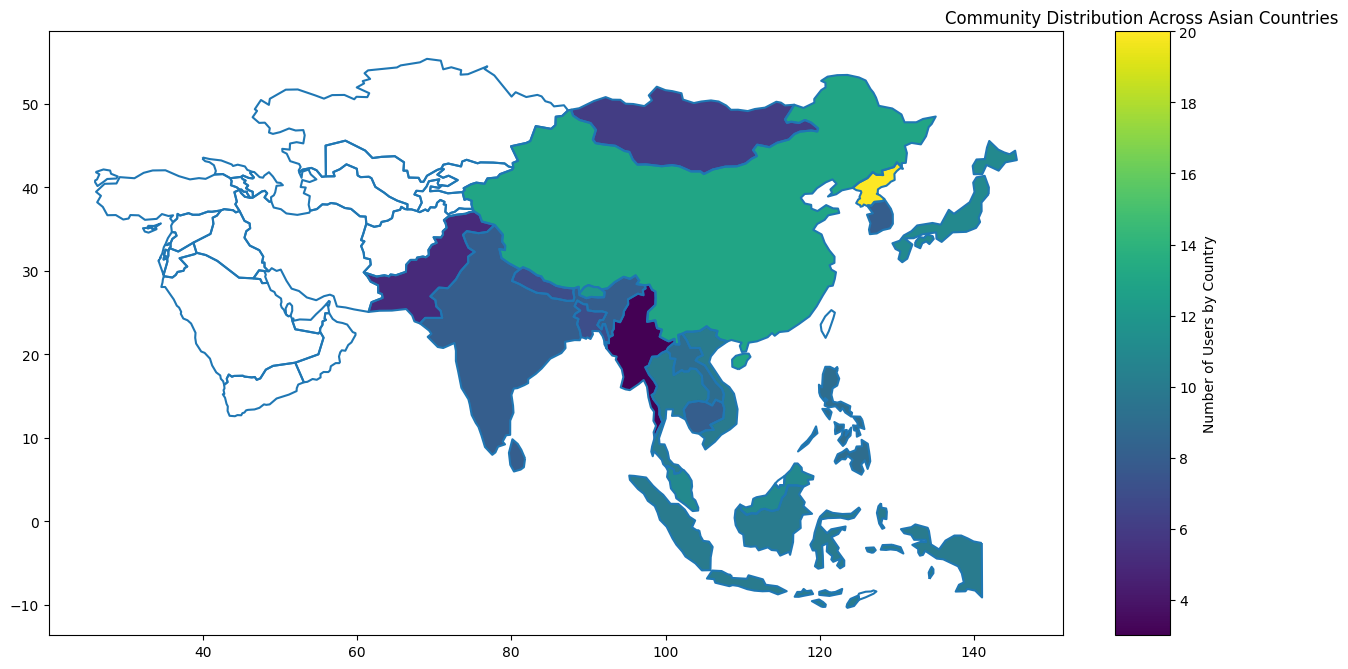

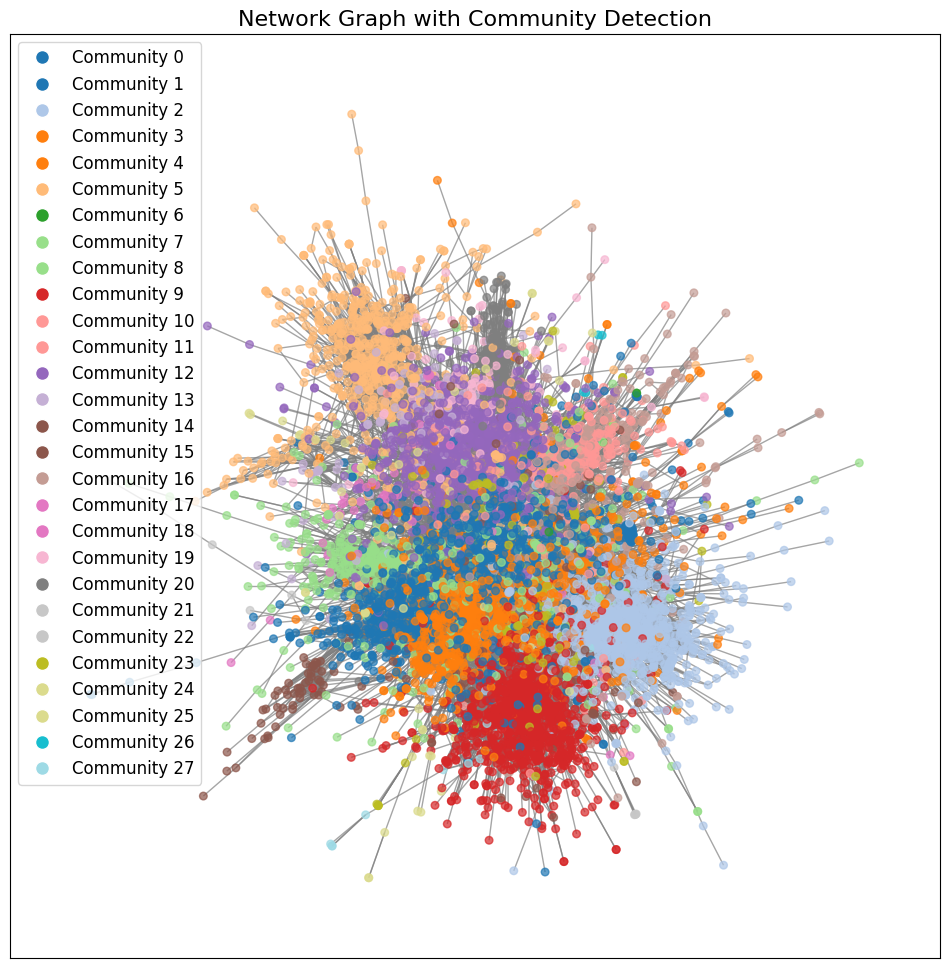

In [16]:

# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for Asia
asia = world[(world.continent == 'Asia')]

# Sum communities by location
location_community_sum = df_merged.groupby('location')['community'].count().reset_index()
location_community_sum.columns = ['location', 'count']

# Merge with geo data
asia = asia.merge(location_community_sum, how='left', left_on='name', right_on='location')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

asia.boundary.plot(ax=ax)
asia.plot(column='count', ax=ax, legend=True, cax=cax, cmap='viridis',
          legend_kwds={'label': "Number of Users by Country",
                       'orientation': "vertical"})

plt.title('Community Distribution Across Asian Countries')
plt.show()

# Draw the graph with community colors and legend
pos = nx.spring_layout(G)
cmap = plt.get_cmap('tab20')
unique_communities = set(partition.values())
colors = [cmap(i / len(unique_communities)) for i in range(len(unique_communities))]
color_map = {comm: colors[i] for i, comm in enumerate(unique_communities)}

node_colors = [color_map[partition[node]] for node in G.nodes]

plt.figure(figsize=(12, 12))
nx.draw_networkx(G, pos, node_color=node_colors, with_labels=False, node_size=30, edge_color='gray', alpha=0.7)

# Create legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[comm], markersize=10)
           for comm in unique_communities]
labels = [f"Community {comm}" for comm in unique_communities]
plt.legend(handles, labels, loc='best', fontsize='large')

plt.title("Network Graph with Community Detection", fontsize=16)
plt.show()

# צמצום צמתים- השתמשות ב-Threshold:

כדי לצמצם את הצמתים ולהפוך את הגרף לברור יותר, השתמשנו בטכניקות של סינון פרטים על בסיס מדדי דמיון. לדוגמה, בחרנו רק את הצמתים החשובים ביותר בכל קהילה וסיננו צמתים עם פחות קשרים.

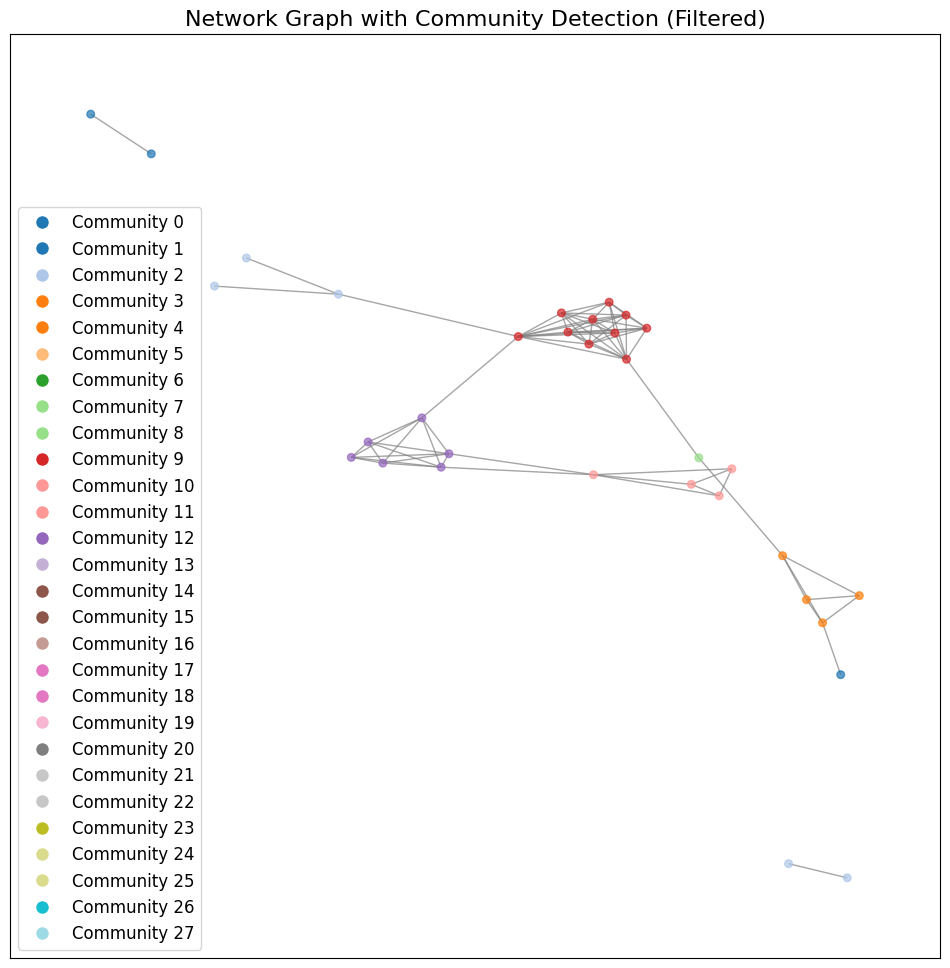

In [17]:
# Get the degree centrality of nodes
degree_centrality = nx.degree_centrality(G)

# Define a threshold to filter nodes
threshold = 0.01  # This can be adjusted

# Filter nodes based on degree centrality
filtered_nodes = [node for node, centrality in degree_centrality.items() if centrality > threshold]

# Create a subgraph with filtered nodes
G_filtered = G.subgraph(filtered_nodes)

# Draw the graph with community colors and legend
pos = nx.spring_layout(G_filtered)
cmap = plt.get_cmap('tab20')
unique_communities = set(partition.values())
colors = [cmap(i / len(unique_communities)) for i in range(len(unique_communities))]
color_map = {comm: colors[i] for i, comm in enumerate(unique_communities)}

node_colors = [color_map[partition[node]] for node in G_filtered.nodes]

plt.figure(figsize=(12, 12))
nx.draw_networkx(G_filtered, pos, node_color=node_colors, with_labels=False, node_size=30, edge_color='gray', alpha=0.7)

# Create legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[comm], markersize=10)
           for comm in unique_communities]
labels = [f"Community {comm}" for comm in unique_communities]
plt.legend(handles, labels, loc='best', fontsize='large')

plt.title("Network Graph with Community Detection (Filtered)", fontsize=16)
plt.show()

## יצירת מפות אינטראקטיביות
בקוד הבא השתמשנו בשני אתרי מחקר

אתר 1- מציג את הז'אנר שהפיקו אותו הכי הרבה במדינות באסיה בשנת 2019

אתר 2- מגיג את הז'אנרים המושמעים ביותר באסיה בשנת 2024

ייצרנו מפה אינטרקטיבית שמציגה כל מדינה באסיה מהאתרים עם הז'אנר המועדף עליה

In [24]:
import folium

# Initialize map centered around Asia
m = folium.Map(location=[20, 100], zoom_start=4)

# Data for countries and their music genres
countries = {
    "China": "Rock, Pop",
    "Hong Kong": "Cantopop",
    "India": "Indian Pop, Bollywood",
    "Indonesia": "Dangdut, Rock",
    "Japan": "J-Pop, Downtempo/Experimental/Punk",
    "Nepal": "Folk, Ambient/Hindustani/New Age",
    "Singapore": "Pop, Punk",
    "South Korea": "K-Pop",
    "Sri Lanka": "Pop Rock/Vocal",
    "Vietnam": "V-Pop, Folk/Pop"
}

# Country coordinates for plotting
coords = {
    "China": [35.8617, 104.1954],
    "Hong Kong": [22.3193, 114.1694],
    "India": [20.5937, 78.9629],
    "Indonesia": [-0.7893, 113.9213],
    "Japan": [36.2048, 138.2529],
    "Nepal": [28.3949, 84.1240],
    "Singapore": [1.3521, 103.8198],
    "South Korea": [35.9078, 127.7669],
    "Sri Lanka": [7.8731, 80.7718],
    "Vietnam": [14.0583, 108.2772]
}

# Colors for each country
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'darkblue', 'darkgreen', 'cadetblue']

# Add markers for each country with genre and country name as tooltip and label
for idx, (country, genre) in enumerate(countries.items()):
    folium.Marker(
        location=coords[country],
        popup=genre,
        tooltip=country,
        icon=folium.Icon(color=colors[idx % len(colors)])
    ).add_to(m)
    folium.map.Marker(
        coords[country],
        icon=folium.DivIcon(
            icon_size=(300,36),
            icon_anchor=(0,0),
            html=f'<div style="font-size: 16pt; color: {colors[idx]};"><b>{country}</b>: {genre}</div>',
        )
    ).add_to(m)

# Save the map to an HTML file
m.save("/asia_music_genres_updated_map_bold.html")

# Display the map
m